In [1]:
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

In [3]:
from datetime import datetime

In [4]:
datetime.now()

datetime.datetime(2023, 3, 27, 18, 2, 24, 331259)

In [5]:
ebola = pd.read_csv('./data/country_timeseries.csv')

In [6]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [7]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [8]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [10]:
ebola_2 = pd.read_csv('./data/country_timeseries.csv', parse_dates=[0])

In [11]:
ebola_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


In [12]:
ebola['year'] = ebola['date_dt'].dt.year
ebola['month'], ebola['day'] = ebola['date_dt'].dt.month, ebola['date_dt'].dt.day

In [15]:
ebola[['Date','date_dt','year','month','day']][:5]

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


In [17]:
ebola['date_dt'].min()

Timestamp('2014-03-22 00:00:00')

In [18]:
ebola['Date'].min()

'1/2/2015'

In [20]:
ebola['outbreak_d'] =ebola['date_dt'] - ebola['date_dt'].min()

In [22]:
ebola[['Date', 'Day', 'outbreak_d']].head()

,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


In [24]:
banks = pd.read_csv('./data/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [26]:
banks = pd.read_csv('./data/banklist.csv', parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
Bank Name                553 non-null object
City                     553 non-null object
ST                       553 non-null object
CERT                     553 non-null int64
Acquiring Institution    553 non-null object
Closing Date             553 non-null datetime64[ns]
Updated Date             553 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.3+ KB


In [28]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017


In [32]:
closing_year = banks.groupby(['closing_year']).size()

In [34]:
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()

In [29]:
import matplotlib.pyplot as plt

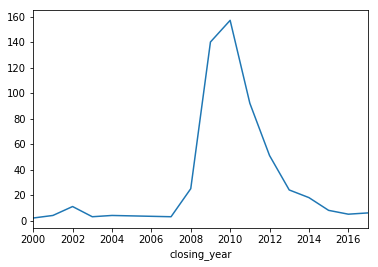

In [33]:
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

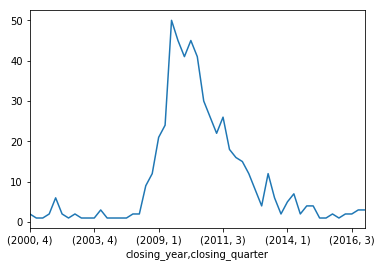

In [36]:
fig, ax =plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [38]:
import pandas_datareader as pdr

In [43]:
tesla = pd.read_csv('./data/tesla_stock_yahoo.csv',parse_dates=[0])

In [44]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [45]:
tesla.loc[(tesla.Date.dt.year==2010) & (tesla.Date.dt.month==6)]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


In [46]:
tesla.index = tesla['Date']
tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-07', '2017-08-08'],
              dtype='datetime64[ns]', name='Date', length=1791, freq=None)

In [47]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [48]:
tesla['2015'].iloc[:5, :5]

,Date,Open,High,Low,Close
Date,,,,,
2015-01-02,2015-01-02,222.869995,223.250000,213.259995,219.309998
2015-01-05,2015-01-05,214.550003,216.500000,207.160004,210.089996
2015-01-06,2015-01-06,210.059998,214.199997,204.210007,211.279999
2015-01-07,2015-01-07,213.350006,214.779999,209.779999,210.949997
2015-01-08,2015-01-08,212.809998,213.800003,210.009995,210.619995


In [49]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ref_date
Date,,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,0 days
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,1 days
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2 days
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,3 days
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7 days


In [51]:
tesla.index = tesla['ref_date']
tesla['0 days':'5 days'].iloc[:5, :5]

,Date,Open,High,Low,Close
ref_date,,,,,
0 days,2010-06-29,19.000000,25.00,17.540001,23.889999
1 days,2010-06-30,25.790001,30.42,23.299999,23.830000
2 days,2010-07-01,25.000000,25.92,20.270000,21.959999
3 days,2010-07-02,23.000000,23.10,18.709999,19.200001


In [52]:
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [53]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [54]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [57]:
ebola_5 = ebola.head()

In [58]:
ebola_5

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [59]:
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
ebola_5.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [61]:
pd.date_range(start='2017-01-01', end='2017-01-07', freq='B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

In [62]:
pd.date_range(start='2017-01-01', end='2017-01-07', freq='2B')

DatetimeIndex(['2017-01-02', '2017-01-04', '2017-01-06'], dtype='datetime64[ns]', freq='2B')

In [63]:
pd.date_range('2017-01-01','2017-12-31', freq='WOM-1THU')

DatetimeIndex(['2017-01-05', '2017-02-02', '2017-03-02', '2017-04-06',
               '2017-05-04', '2017-06-01', '2017-07-06', '2017-08-03',
               '2017-09-07', '2017-10-05', '2017-11-02', '2017-12-07'],
              dtype='datetime64[ns]', freq='WOM-1THU')

In [64]:
pd.date_range('2017-01-01','2017-12-31', freq='WOM-3FRI')

DatetimeIndex(['2017-01-20', '2017-02-17', '2017-03-17', '2017-04-21',
               '2017-05-19', '2017-06-16', '2017-07-21', '2017-08-18',
               '2017-09-15', '2017-10-20', '2017-11-17', '2017-12-15'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [65]:
import matplotlib.pyplot as plt

In [69]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2015-01-05 to 2014-03-22
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 18.1 KB


ValueError: view limit minimum -36780.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa4fa386c80> (for post_execute):


ValueError: view limit minimum -36780.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

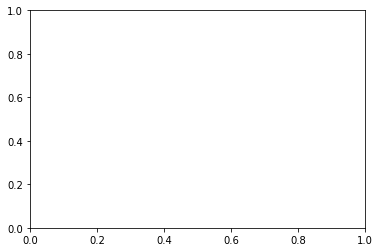

ValueError: view limit minimum -36780.15 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [71]:
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.plot()
ax.legend(fontsize=7,
         loc=2,
         borderaxespad=0.)
plt.show(x='Date')

In [74]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
ebola_sub.head()

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2015-01-05,289,2776.0,NaN
2015-01-04,288,2775.0,NaN
2015-01-03,287,2769.0,8166.0
2015-01-02,286,NaN,8157.0
2014-12-31,284,2730.0,8115.0


In [76]:
ebola = pd.read_csv('./data/country_timeseries.csv', index_col='Date', parse_dates=['Date'])
ebola.head().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,286,NaN,8157.0,NaN
2014-12-31,284,2730.0,8115.0,9633.0


In [82]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [83]:
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [84]:
new_idx = reversed(new_idx)
ebola = ebola.reindex(new_idx)

In [85]:
ebola.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
down = ebola.resample('M').mean()
down.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2014-03-31,4.500000,94.500000,6.500000,3.333333,NaN,NaN,NaN,NaN,NaN,62.000000,3.750000,3.000000,NaN,NaN,NaN,NaN,NaN
2014-04-30,24.333333,177.818182,24.555556,2.200000,NaN,NaN,NaN,NaN,NaN,113.636364,9.625000,1.111111,NaN,NaN,NaN,NaN,NaN
2014-05-31,51.888889,248.777778,12.555556,7.333333,NaN,NaN,NaN,NaN,NaN,166.666667,11.111111,1.222222,NaN,NaN,NaN,NaN,NaN
2014-06-30,84.636364,373.428571,35.500000,125.571429,NaN,NaN,NaN,NaN,NaN,250.428571,28.000000,29.375000,NaN,NaN,NaN,NaN,NaN
2014-07-31,115.700000,423.000000,212.300000,420.500000,1.333333,NaN,NaN,NaN,NaN,316.300000,121.300000,189.500000,0.666667,NaN,NaN,NaN,NaN


In [87]:
up = ebola.resample('D').mean()
up.iloc[:5,:5]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria
Date,,,,,
2014-03-22,0.0,49.0,NaN,NaN,NaN
2014-03-23,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN
2014-03-26,4.0,86.0,NaN,NaN,NaN


In [88]:
import pytz

In [89]:
import re
regex = re.compile(r'^US')
selected_files = filter(regex.search, pytz.common_timezones)

In [91]:
list(selected_files)

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific']

In [92]:
depart = pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')
depart

Timestamp('2017-08-29 07:00:00-0400', tz='US/Eastern')